## Video game review data 

json file: https://nijianmo.github.io/amazon/index.html

In [16]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
with open('Video_Games_5.json') as f:
    data = ndjson.load(f)

reviews_df=pd.DataFrame(data)

In [18]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [19]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


In [20]:
reviews_df.shape

(497577, 12)

<Axes: xlabel='overall', ylabel='count'>

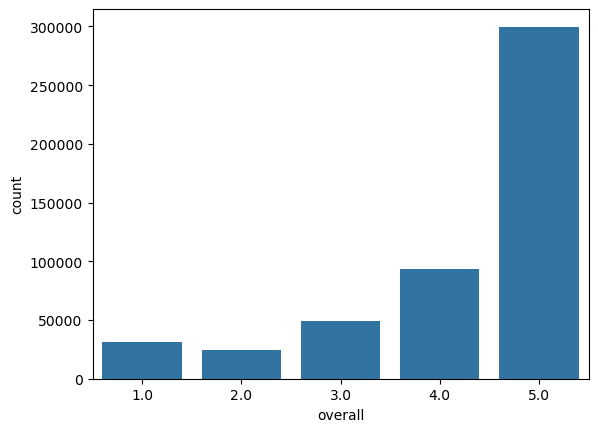

In [21]:
sns.countplot(x='overall',data=reviews_df)  

In [22]:
len(reviews_df['asin'].value_counts(dropna=False))

17408

## Undersampling of reviews

1,5 star-> 1500

2,3,4 star-> 500 

In [23]:
reviews_df['overall'].value_counts()

overall
5.0    299759
4.0     93654
3.0     49146
1.0     30883
2.0     24135
Name: count, dtype: int64

In [24]:
one_1500=reviews_df[reviews_df['overall']==1.0].sample(1500,random_state=42)
two_500=reviews_df[reviews_df['overall']==2.0].sample(500,random_state=42)
three_500=reviews_df[reviews_df['overall']==3.0].sample(500,random_state=42)
four_500=reviews_df[reviews_df['overall']==4.0].sample(500,random_state=42)
five_1500=reviews_df[reviews_df['overall']==5.0].sample(1500,random_state=42)

In [25]:
undersampled_df=pd.concat([one_1500,two_500,three_500,four_500,five_1500])
undersampled_df['overall'].value_counts()

overall
1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

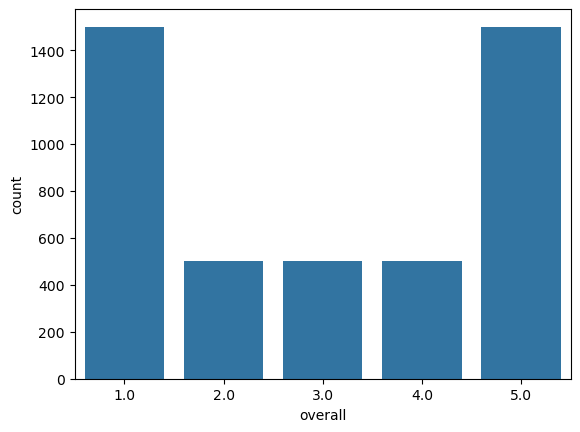

In [26]:
sns.countplot(x='overall',data=undersampled_df)

### Random Sampling of 100K reviews

In [27]:
samples_per_rating = {
    1: 10000,
    2: 10000,
    3: 20000,  # Intentionally sampling fewer neutral reviews
    4: 10000,
    5: 10000
}
weighted_corpus = (
    reviews_df.groupby('overall')
    .apply(lambda x: x.sample(n=samples_per_rating[x.name], random_state=42))
    .reset_index(drop=True)
)
print(weighted_corpus['overall'].value_counts())

overall
3.0    20000
1.0    10000
2.0    10000
4.0    10000
5.0    10000
Name: count, dtype: int64


C:\Users\pragya\AppData\Local\Temp\ipykernel_24840\255966720.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=samples_per_rating[x.name], random_state=42))


## Creating .csv file

In [28]:
undersampled_df.to_csv('small_corpus.csv',index=False)
weighted_corpus.to_csv('big_corpus.csv',index=False)